# Metropolis Hastings


This is a simple notebook to play with the Metropolis Hasting (MH) algorithm. We will be simulating the following distribution
$$ p(x)=6x(1-x)$$ with $0\le x\le1$. This example is based on notes linked in reading.

<ul>
<li> Show this is a valid probability distribution.
<li> Consider a proposal distribution,$g(x^\prime|x)$ for a new $x^\prime$ given current $x$ of the from 
$$ g(x^\prime|x)={e^{-(x^\prime-x)^2/2\sigma^2} \over \sqrt{2\sigma^2 \pi}}.$$
Show that in the MH the acceptance probability is given by
$$ A(x^\prime|x)= min\{1, {p(x^\prime)\over p(x)}\}$$ for any choice of $\sigma^2$.
<li> Run the MC simulation below with $\sigma=0.5$ for differnt number of steps for $n=100,1000,10000$. Plot a histogram of the results. How does your result depend on $n$.
<li> Now choose $n=10000$ and vary $\sigma=0.01,1,100$. How do your results change? Can you think explain this in terms of the acceptance probability.
</ul>

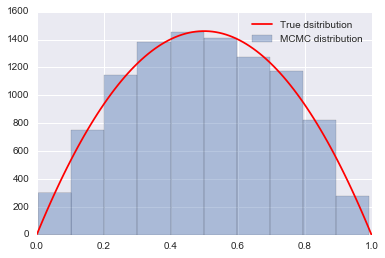

In [14]:
%matplotlib inline 
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns




## FUNCTIONS 
# target distribution p(x) 
p = lambda x: 6*x*(1-x)

# number of samples
n = 10000

sig =100


#intitialize the sampling. Start somewhere from 0..1
x0 = np.random.uniform()


x_prev = x0

x=[]
k=1
i=0
while i<n:
    
    x_star = np.random.normal(x_prev, sig)
    while  (x_star <0) | (x_star > 1):  # MAKE SURE WE STAY WITHIN BOUNDS
        x_star = np.random.normal(x_prev, sig)
    
    
    
    P_star = 6*x_star*(1-x_star) #p(x_star);
    P_prev = 6*x_prev*(1-x_prev) #p(x_prev);
    U =  np.random.uniform()
    
    A =  P_star/P_prev
    if U < A:
        x.append(x_star)
        i = i + 1
        x_prev = x_star
    else :
        x.append(x_prev)
        x_prev = x[i]  
        i = i + 1
 
        k=k+1



e,q,h=plt.hist(x,10, alpha=0.4, label=u'MCMC distribution') 



xx= np.linspace(0,1,100)
plt.plot(xx, 0.67*np.max(e)*p(xx), 'r', label=u'True dsitribution') 
plt.legend()